In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, confusion_matrix
)
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt



In [16]:
# Load dataset
df = pd.read_csv("C:/Users/ASUS/Desktop/MINI_project/Data_p/preprocessed.csv")

In [17]:
# Define features (X) and target (y)
X = df.drop(columns=["RainTomorrow", "RISK_MM"])  # Removing target variable and RISK_MM (continuous rain measure)
y = df["RainTomorrow"].astype(int)  # Convert boolean target to integer (0 or 1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Model Training
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [31]:
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred, pos_label=1)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred, pos_label=1)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
gmean = geometric_mean_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

Naïve Bayes Classifier Results:
Accuracy      : 0.78
Precision (1) : 0.50
Precision (0) : 0.89
Recall (1)    : 0.64
Recall (0)    : 0.82
F1 Score (1)  : 0.56
F1 Score (0)  : 0.85
G-Mean        : 0.72
ROC AUC Score : 0.82

Confusion Matrix:
 [[18095  4003]
 [ 2290  4051]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85     22098
           1       0.50      0.64      0.56      6341

    accuracy                           0.78     28439
   macro avg       0.70      0.73      0.71     28439
weighted avg       0.80      0.78      0.79     28439


Average Probability of 'No Rain': 0.71


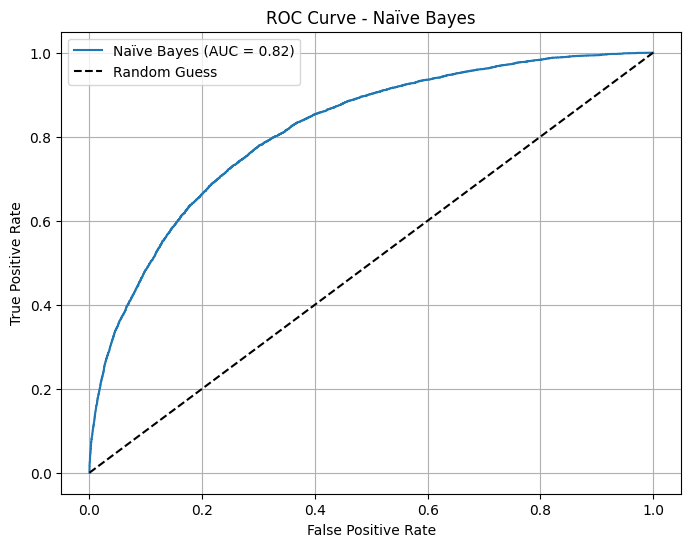

In [32]:
# Output
print("Naïve Bayes Classifier Results:")
print(f"Accuracy      : {acc:.2f}")
print(f"Precision (1) : {prec_1:.2f}")
print(f"Precision (0) : {prec_0:.2f}")
print(f"Recall (1)    : {rec_1:.2f}")
print(f"Recall (0)    : {rec_0:.2f}")
print(f"F1 Score (1)  : {f1_1:.2f}")
print(f"F1 Score (0)  : {f1_0:.2f}")
print(f"G-Mean        : {gmean:.2f}")
print(f"ROC AUC Score : {auc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Probability of no rain
prob_no_rain = y_proba_full[:, 0]
print(f"\nAverage Probability of 'No Rain': {prob_no_rain.mean():.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Naïve Bayes (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.grid()
plt.show()